## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [6]:
sts.adfuller(df.market_value)

(-1.9041551418836877,
 0.33010893277028264,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Using Returns

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [9]:
sts.adfuller(df.returns)

(-12.770265719497253,
 7.798058336037657e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

## ACF and PACF for Returns

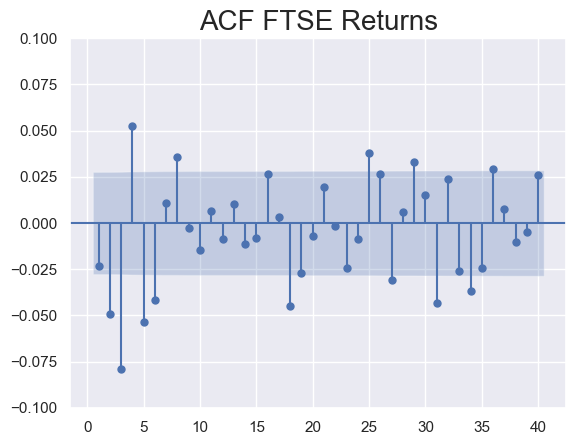

In [47]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title('ACF FTSE Returns', size=20)
plt.ylim(-0.1,0.1)
plt.show()

(-0.1, 0.1)

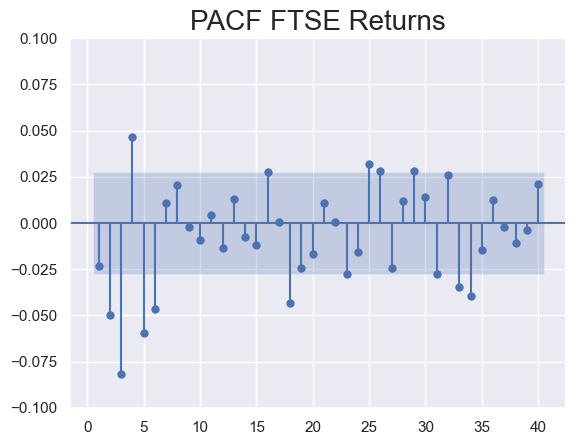

In [11]:
sgt.plot_pacf(df.returns, lags=40, zero=False)
plt.title('PACF FTSE Returns', size=20)
plt.ylim(-0.1,0.1)

## AR(1) for Returns

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
model_ret_ar_1 = ARIMA(df.returns, order=(1,0,0))
result_ret_ar_1 = model_ret_ar_1.fit()
result_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Mon, 25 Mar 2024   AIC                          15865.497
Time:                        09:07:09   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models for Returns

In [14]:
model_ret_ar_2 = ARIMA(df.returns, order=(2,0,0))
result_ret_ar_2 = model_ret_ar_2.fit()
result_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Mon, 25 Mar 2024   AIC                          15854.911
Time:                        09:07:09   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.000      -0.065      -0.035
sigma2         1.3756      0.014     99.592      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [16]:
model_ret_ar_3 = ARIMA(df.returns, order=(3,0,0))
result_ret_ar_3 = model_ret_ar_3.fit()
result_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Mon, 25 Mar 2024   AIC                          15823.477
Time:                        09:07:11   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3664      0.014     94.518      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6859.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [18]:
model_ret_ar_6 = ARIMA(df.returns, order=(6,0,0))
result_ret_ar_6 = model_ret_ar_6.fit()
result_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Mon, 25 Mar 2024   AIC                          15789.890
Time:                        09:07:13   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.000      -0.068      -0.037
ar.L3         -0.0870      0.008    -10.853      0.000      -0.103      -0.071
ar.L4          0.0424      0.008      5.133      0.000       0.026       0.059
ar.L5         -0.0607      0.008     -7.568      0.000      -0.076      -0.045
ar.L6         -0.0466      0.009     -5.216      0.000      -0.064      -0.029
sigma2         1.3557      0.015     92.513      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6487.37
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model_ret_ar_7 = ARIMA(df.returns, order=(7,0,0))
result_ret_ar_7 = model_ret_ar_7.fit()
result_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7886.647
Date:                Mon, 25 Mar 2024   AIC                          15791.294
Time:                        09:07:14   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.304      0.192      -0.010       0.047
ar.L1         -0.0240      0.009     -2.579      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.375      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.725      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.183      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.463      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.173      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.205      0.228      -0.007       0.029
sigma2         1.3555      0.015     91.777      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
LLR_test(model_ret_ar_6,model_ret_ar_7)

0.44

## Normalizing Values

In [21]:
benchmark = df.market_value.iloc[0]

In [22]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [23]:
sts.adfuller(df.norm)

(-1.8928710132672364,
 0.33542220743300655,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [24]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [25]:
sts.adfuller(df.norm_ret)

(-12.770265719497262,
 7.798058336037265e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

## Normalized Returns

In [26]:
model_norm_ret_ar_1 = ARIMA(df.norm_ret, order = (1,0,0))
result_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
result_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.743
Date:                Mon, 25 Mar 2024   AIC                          80709.487
Time:                        09:16:45   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.960    100.071      0.000    5.51e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.68
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
model_norm_ret_ar_2 = ARIMA(df.norm_ret, order = (2,0,0))
result_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
result_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40345.450
Date:                Mon, 25 Mar 2024   AIC                          80698.901
Time:                        09:26:12   BIC                          80724.986
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.050     -1.191      0.234     -31.671       7.725
ar.L1         -0.0242      0.009     -2.797      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.368      0.000      -0.065      -0.035
sigma2      5.603e+05   5628.139     99.561      0.000    5.49e+05    5.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.40
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_norm_ret_ar_7 = ARIMA(df.norm_ret, order = (7,0,0))
result_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
result_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40308.642
Date:                Mon, 25 Mar 2024   AIC                          80635.285
Time:                        09:26:51   BIC                          80693.975
Sample:                    01-10-1994   HQIC                         80655.851
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.262     -1.293      0.196     -30.126       6.179
ar.L1         -0.0240      0.009     -2.577      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.370      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.717      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.178      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.457      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.169      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.204      0.228      -0.007       0.029
sigma2      5.524e+05   6023.895     91.707      0.000    5.41e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Analysing the Residuals

In [33]:
df['res_price'] = result_ret_ar_7.resid

In [34]:
df.res_price.mean()

-4.655650075921429e-05

In [35]:
df.res_price.var()

1.3558192431242042

In [36]:
sts.adfuller(df.res_price)

(-70.8358491781613,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15691.957360554414)

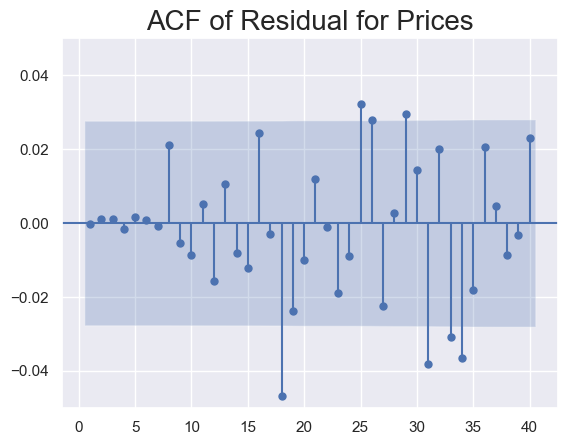

In [51]:
sgt.plot_acf(df.res_price, zero=False, lags=40)
plt.title('ACF of Residual for Prices', size = 20)
plt.ylim(-0.05,0.05)
plt.show()

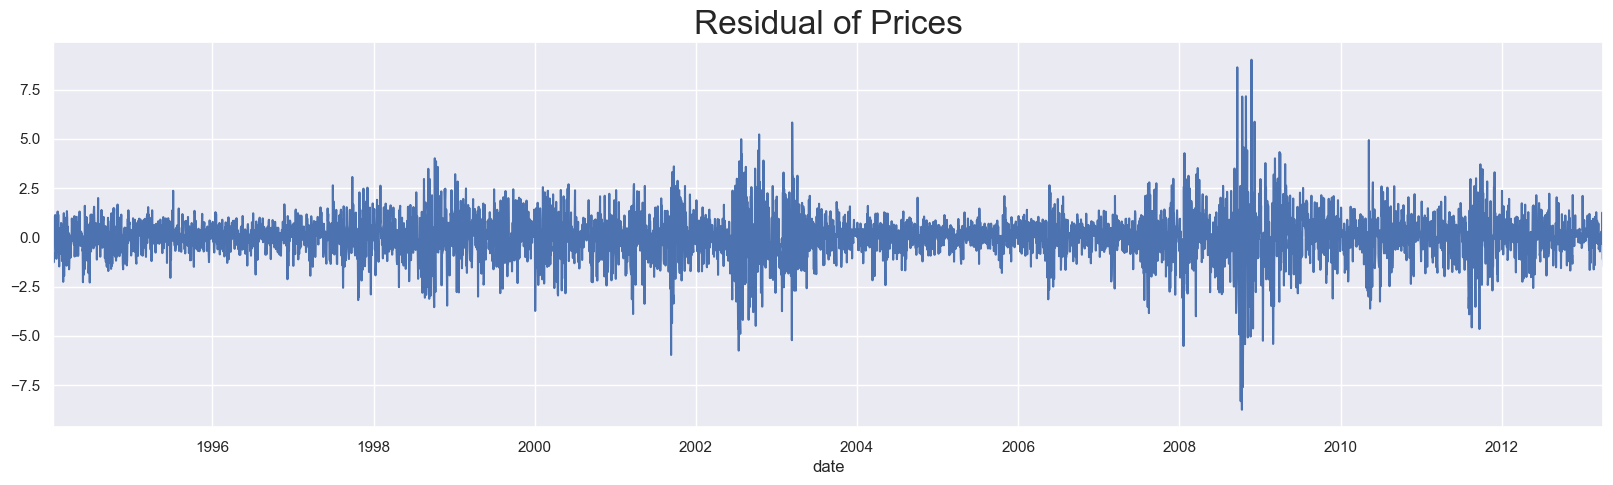

In [53]:
df.res_price[1:].plot(figsize=(20,5))
plt.title('Residual of Prices', size=24)
plt.show()

In [55]:
df['res_ret'] = result_ret_ar_6.resid

In [56]:
df.res_ret.mean()

-4.853044315245715e-05

In [57]:
df.res_ret.var()

1.3559802128715095

In [58]:
sts.adfuller(df.res_ret)

(-70.78411835821436,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570807333355)

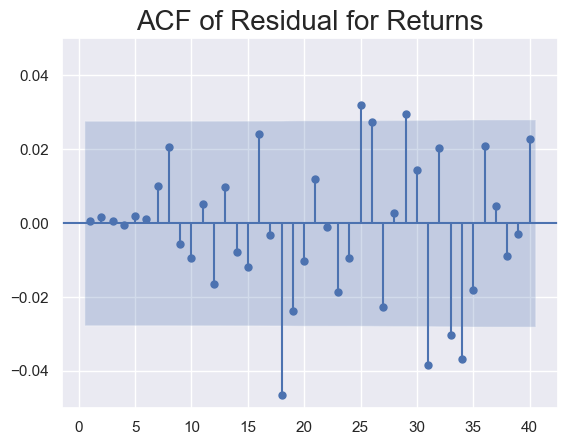

In [62]:
sgt.plot_acf(df.res_ret, zero = False, lags=40)
plt.title('ACF of Residual for Returns', size = 20)
plt.ylim(-0.05,0.05)
plt.show()

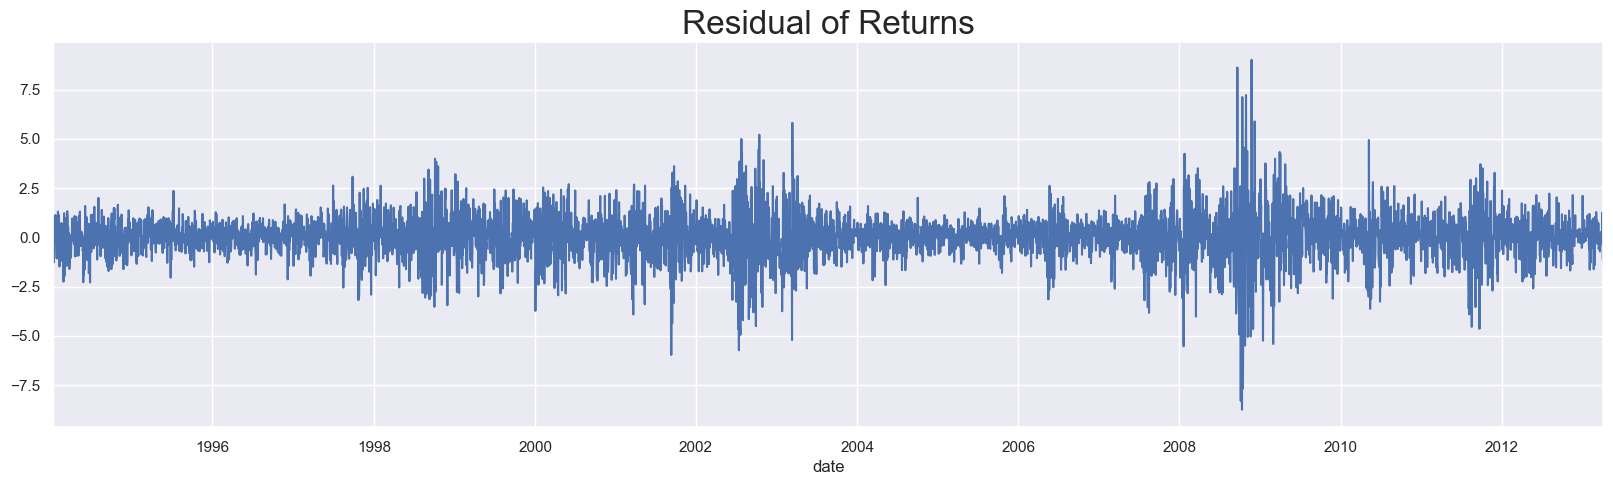

In [63]:
df.res_ret.plot(figsize=(20,5))
plt.title('Residual of Returns', size=24)
plt.show()